<a href="https://colab.research.google.com/github/FabioRochaPoeta/wine-case/blob/main/wine-case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos analisar vinhos!

![](https://media.giphy.com/media/3zfox4LvqnIas/giphy.gif)

Usaremos um dataset composto por propriedades físico-químicas de vinhos brancos. Temos 1599 amostras e um total de 11 variáveis independentes, descritas abaixo:

 - `fixed acidity`: a maioria dos ácidos envolvidos com vinho (não evaporam prontamente)
 - `volatile acidity`: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
 - `citric acid`: encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
 - `residual sugar`: a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
 - `chlorides`: a quantidade de sal no vinho
free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
 - `total sulfur dioxide`: Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
 - `density`: a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
 - `pH`: descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
 - `sulphates`: um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
 - `alcohol`: o percentual de álcool no vinho


Existe ainda uma variável chamada `quality`. Essa variável é uma nota de qualidade do vinho que varia de 0 a 10.

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


wine = pd.read_csv(url, sep=";")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks")
sns.set_context("paper")

In [ ]:
wine.shape

(1599, 12)

<Axes: >

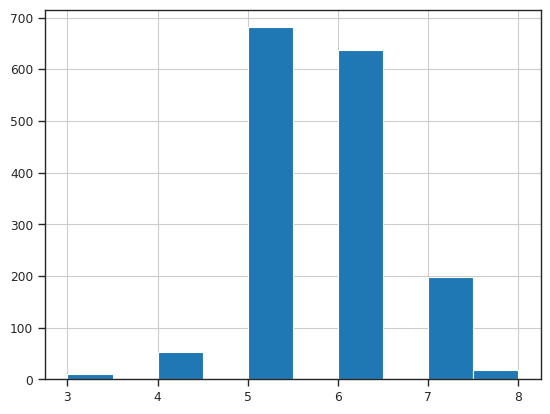

In [ ]:
wine.quality.hist()

In [ ]:
number_of_wines = wine.shape[0]
wine['category'] =  np.zeros((number_of_wines, 1))
wine.loc[wine.quality > 5, "category"] = 1
# wine["category"] = (wine.quality > 5).astype(float)

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'category'],
      dtype='object')

In [ ]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'category'
]

#sns.pairplot(wine[vars],
#             hue="category",
#             height=4)

In [ ]:
#sns.pairplot(wine[vars],
#             hue="category",
#             kind="reg",
#             height=4)

<Axes: >

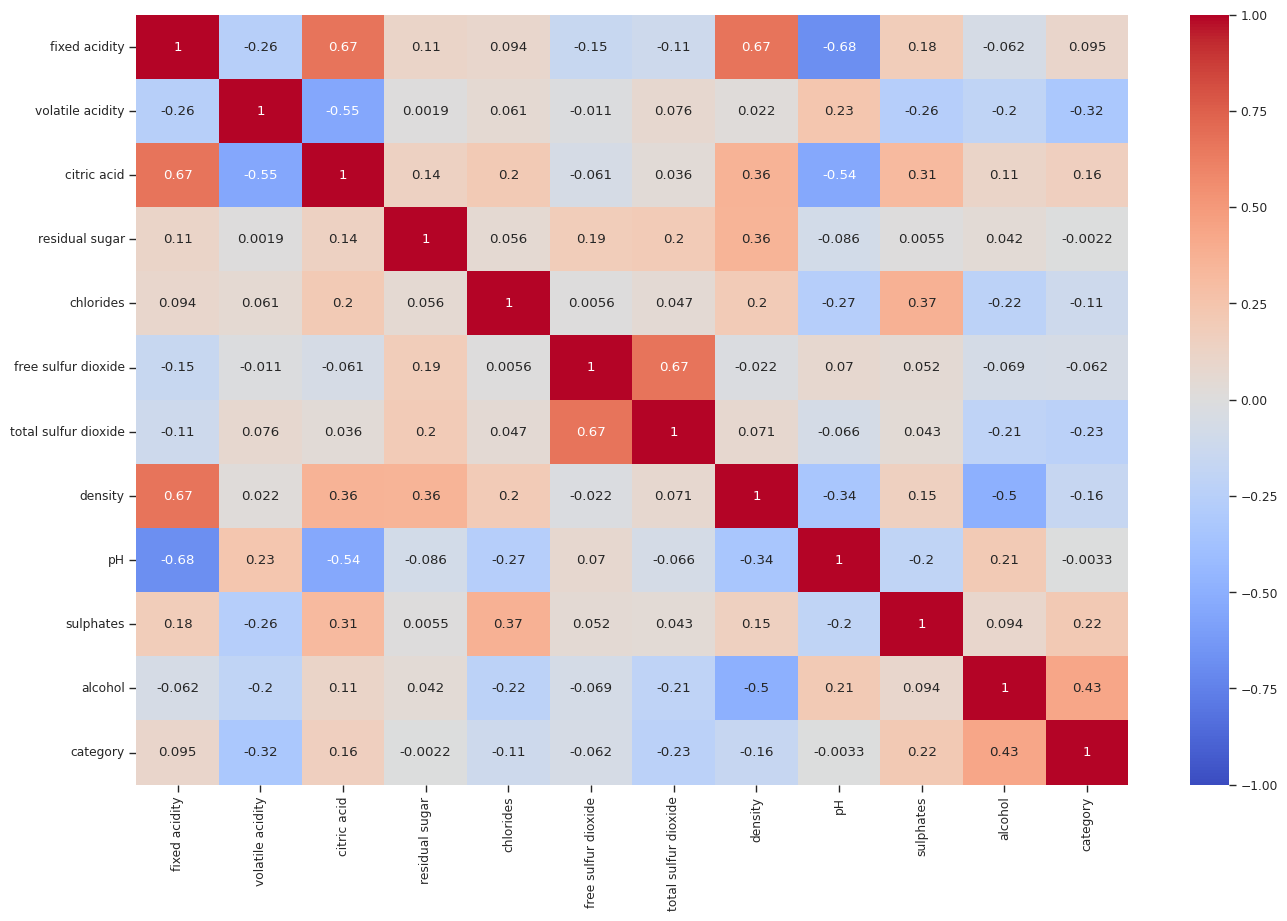

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.heatmap(wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="coolwarm")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine[vars],
                                                    wine['category'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=wine['category'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
logreg = LogisticRegression(max_iter=10000)


logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_hat = logreg.predict_proba(X_train_scaled)
print(y_hat.shape)

(1279, 2)


<ipython-input-32-3fda76210974>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
<ipython-input-32-3fda76210974>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)


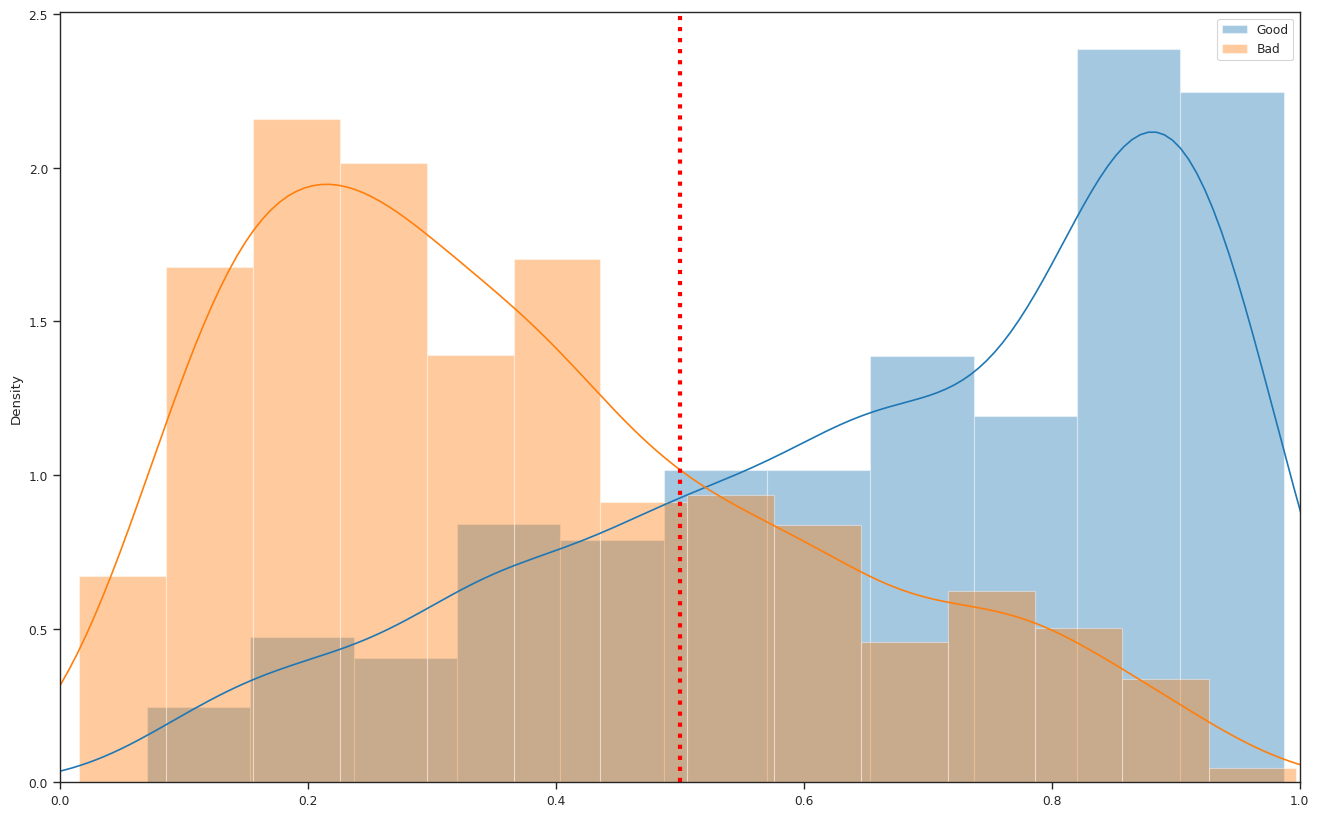

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.distplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
ax.set_xlim([0, 1])
sns.distplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)
ax.legend();
ax.axvline(0.5, color="red", ls=":", lw=3)

In [ ]:
cm

array([[434, 161],
       [168, 516]])

[Text(0, 0.5, 'Ruim (0)'), Text(0, 1.5, 'Bom (1)')]

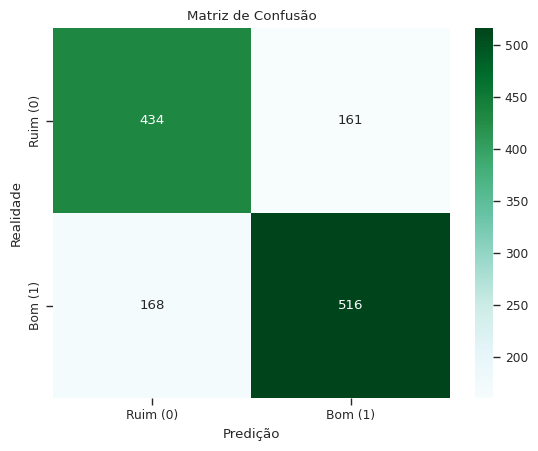

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

#cm = np.array([[434, 161], [1168, 516]])

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"])
ax.set_yticklabels(["Ruim (0)", "Bom (1)"])


In [ ]:
cm[0, 1]

161

In [ ]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

print(f"A precisão é {100*  precision:.2f} %")

A precisão é 76.22 %


In [ ]:
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

print(f"A acurácia é {100 * accuracy:.2f} %")

A acurácia é 74.28 %


In [ ]:
sensibility = (cm[1, 1] / (cm[1, 1] + cm[1, 0]))
print(f"A sensibilidade é {100 *  sensibility:.2f} %")

A sensibilidade é 75.44 %


In [ ]:
specifity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 

print(f"A especificidade é {100 * specifity:.2f} %")

A especificidade é 72.94 %


In [ ]:
F1_score = 2 *(sensibility * precision) / (sensibility + precision)

print(f"F1 Score =  {F1_score:.2f}")

F1 Score =  0.76


<ipython-input-28-9d582b94dbad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_test[y_test.values == 1, 1], label="Good", ax=ax)
<ipython-input-28-9d582b94dbad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_test[y_test == 0, 1], label="Bad", ax=ax)


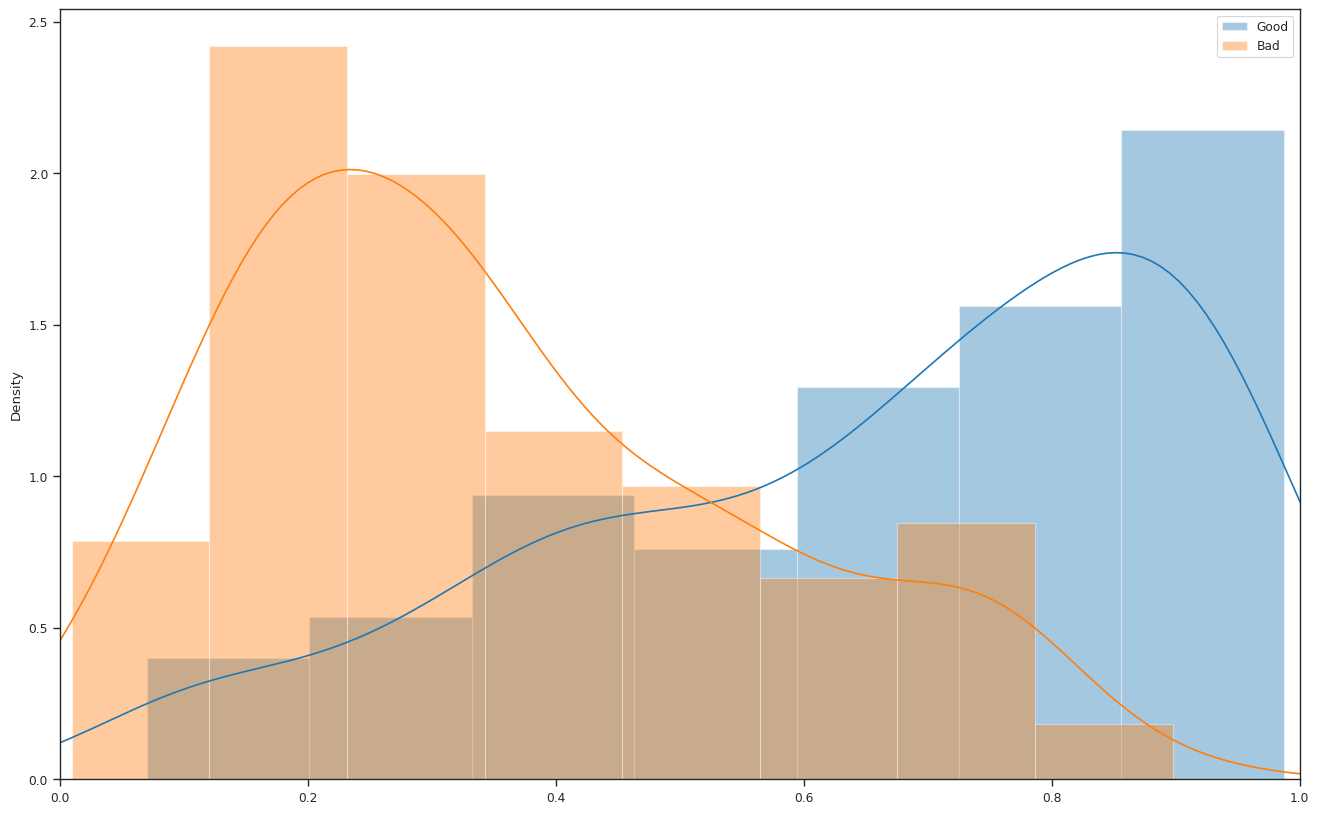

In [ ]:
y_hat_test = logreg.predict_proba(X_test_scaled)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.distplot(y_hat_test[y_test.values == 1, 1], label="Good", ax=ax)
ax.set_xlim([0, 1])
sns.distplot(y_hat_test[y_test == 0, 1], label="Bad", ax=ax)
ax.legend();


In [ ]:
y_hat

array([[0.542556  , 0.457444  ],
       [0.60215672, 0.39784328],
       [0.29583066, 0.70416934],
       ...,
       [0.842525  , 0.157475  ],
       [0.60326759, 0.39673241],
       [0.37158652, 0.62841348]])